<a href="https://colab.research.google.com/github/NytKing/assig/blob/main/Google_Trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load** **the** **dataset**

In [1]:
import numpy as np
import pandas as pd

mar=pd.read_csv("https://storage.googleapis.com/sample_user_behavior_data/sample_user_data.csv")
mar

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,785078151568671210,1,20170427,1493331229,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,142102319075727733,1,20170427,1493316667,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1015855318272495035,1,20170427,1493295075,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,7452646484470618802,1,20170427,1493299324,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,1985244892543433393,3,20170427,1493309497,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464434,19334811510064057,1,20170223,1487864152,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),mobile,iOS,not available in demo dataset,not available in demo dataset,Organic Search
464435,7224186991271954234,2,20170223,1487897246,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,San Francisco,Organic Search
464436,6280201894815387104,1,20170223,1487881348,1.0,1.0,NaN,NaN,NaN,(direct),(none),(not set),mobile,Android,not available in demo dataset,Bogota,Direct
464437,4821847590453032628,1,20170223,1487872772,1.0,1.0,NaN,NaN,NaN,int.search.tb.ask.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Referral


**Check for Null values and visualizing using missingno**

In [2]:
mar.isnull().sum()

fullVisitorId                   0
VisitNumber                     0
Date                            0
VisitStartTime                  0
bounces                    232261
pageviews                      52
timeOnSite                 232827
totalTransactionRevenue    458131
transactions               458131
source                          0
medium                          0
campaign                        0
deviceCategory                  0
operatingSystem                 0
mobileDeviceModel               0
city                            0
ChannelGrouping                 0
dtype: int64

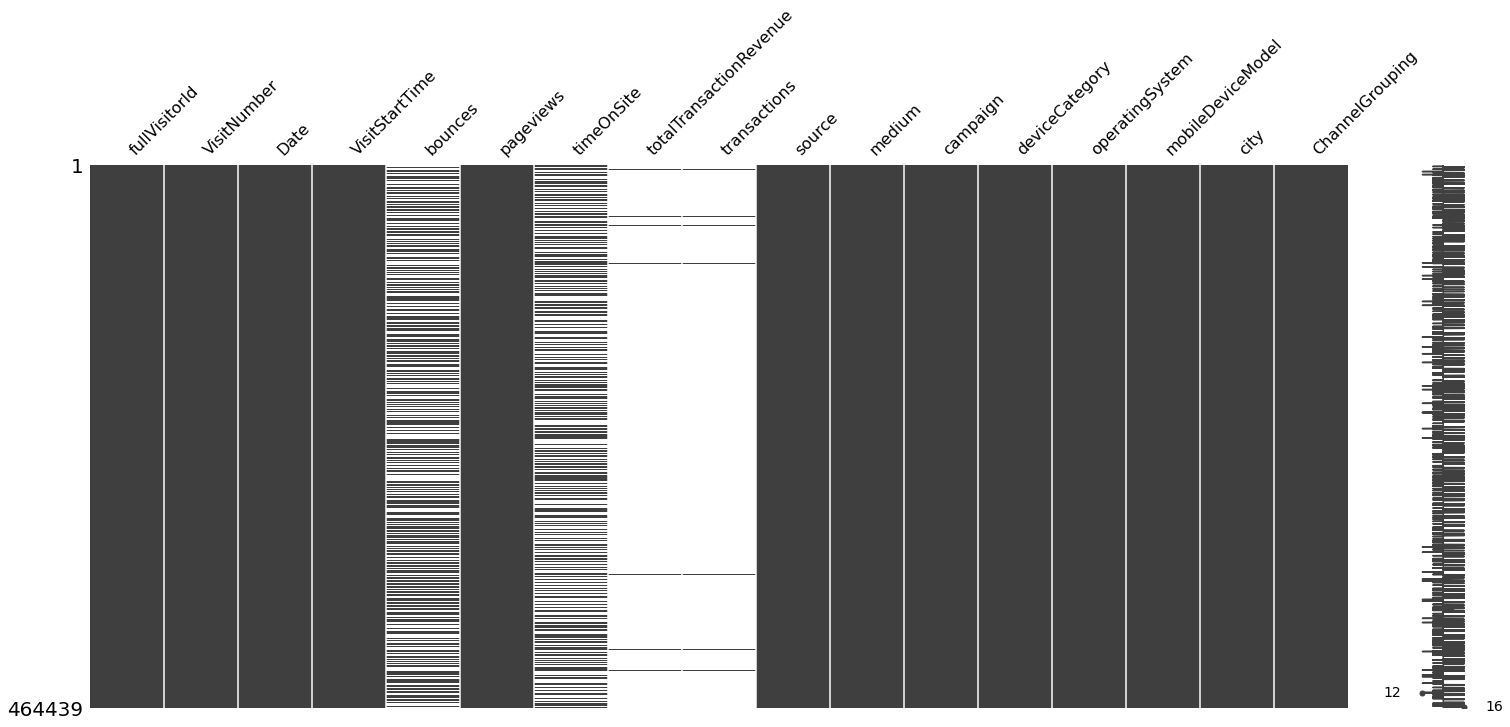

In [3]:
import missingno as miss
miss.matrix(mar)

**Filling null , values dropping columns and combining levels of a cloumn** 

In [4]:
mar['bounces'].fillna(value=0,inplace=True)
mar['pageviews'].fillna(value=0,inplace=True)
mar["timeOnSite"].fillna(value=0,inplace=True)
mar["totalTransactionRevenue"].fillna(value=0,inplace=True)
mar["transactions"].fillna(value=0,inplace=True)

**This column was dropped because the column has no values in it and was not useful**

In [5]:
mar.drop(labels="mobileDeviceModel",axis=1,inplace=True)

**The column "source" had many levels so I decided to group levels that were similar** 

In [6]:
mar["source"]=np.where(mar["source"].isin(['google', 'docs.google.com', 'google.de', 'analytics.google.com',
       'google.co.jp', 'google.com', 'connect.googleforwork.com',
       'google.co.uk', 'google.lk', 'googleads.g.doubleclick.net',
       'sites.google.com', 'mail.google.com', 'chat.google.com',
       'hangouts.google.com', 'newsstand.google.com',
       'adwords.google.com', 'groups.google.com', 'images.google',
       'plus.google.com', 'google.it', 'google.es',
       'desktop.google.com.ua', 'myactivity.google.com',
       'images.google.co.id', 'productforums.google.com',
       'datastudio.google.com', 'optimize.google.com',
       'plus.url.google.com', 'google.com.au', 'support.google.com',
       'google.fr', '9to5google.com', 'google.co.in', 'google.com.pe',
       'keep.google.com', 'google.co.id', 'google.ru', 'google.co.th',
       'google.ca', 'google.nl', 'google.cl', 'google.com.br',
       'google.no', 'inbox.google.com', 'google.com.mx', 'google.rs',
       'myaccount.google.com', 'google.pl', 'google.ch',
       'images.google.de', 'google.com.pk', 'google.com.ua',
       'google.com.hk', 'voice.google.com', 'images.google.fr',
       'google.bg', 'images.google.ie', 'google.co.nz',
       'csfirst.withgoogle.com', 'google.co.za', 'google.com.tw',
       'google.at', 'google.com.ph', 'calendar.google.com',
       'images.google.com.au', 'staging.talkgadget.google.com',
       'images.google.lk', 'images.google.lt', 'gsuite.google.com',
       'google.co.il', 'earth.google.com', 'google.co.kr',
       'spaces.google.com']),"google",mar['source'])


In [7]:
mar['source']=np.where(mar['source'].isin(['yahoo', 'finance.yahoo.com', 'yahoo.com', 'au.search.yahoo.com',
       'se.search.yahoo.com', 'in.search.yahoo.com',
       'fr.search.yahoo.com', 'mg.mail.yahoo.com', 'uk.search.yahoo.com',
       'tw.search.yahoo.com', 'ca.search.yahoo.com',
       'us.search.yahoo.com', 'ph.search.yahoo.com',
       'it.search.yahoo.com', 'us.yhs4.search.yahoo.com',
       'mx.search.yahoo.com', 'malaysia.search.yahoo.com',
       'es.search.yahoo.com', 'sg.search.yahoo.com',
       'br.search.yahoo.com', 'se.yhs4.search.yahoo.com',
       'hk.search.yahoo.com', 'apis.mail.yahoo.com',
       'maktoob.search.yahoo.com', 'fr.yhs4.search.yahoo.com',
       'nl.search.yahoo.com', 'espanol.search.yahoo.com']),"yahoo",mar['source'])

In [8]:
mar["source"]=np.where(mar['source'].isin(['lm.facebook.com', 'm.facebook.com', 'l.facebook.com',
       'facebook.com', 'web.facebook.com']),"facebook",mar['source'])

In [9]:
mar["source"]=np.where(mar['source'].isin(['youtube.com', 'm.youtube.com']),"Youtube",mar['source'])

In [10]:
mar["source"]=np.where(mar['source'].isin(['duckduckgo.com', 'siliconvalley.about.com', 'm.baidu.com',
       'qiita.com', 'flipboard.com', 'feedly.com',
       'int.search.tb.ask.com', 'uk.businessinsider.com',
       'businessinsider.com', 'markets.businessinsider.com', 'github.com',
       'quora.com', 'reddit.com', 'pinterest.com', 'search.mysearch.com',
       'phandroid.com', 'gophergala.com', 'm.reddit.com', 'msn.com',
       'l.messenger.com', 'search.myway.com', 'dealspotr.com',
       'search.xfinity.com', 'lunametrics.com',
       'nordic.businessinsider.com', 'search.tb.ask.com',
       'outlook.live.com', 'twitter.com', 'away.vk.com',
       'search.1and1.com', 'online-metrics.com', 'blognone.com',
       'web.skype.com', 'amazon.com', 'meetup.com', 'm.sogou.com',
       'kik.com', 'linkedin.com', 'web.mail.comcast.net', 'getpocket.com',
       'marketingland.com', 'good.barkpost.com', 'gist.github.com',
       'computerworld.com', 'getiriver.com', 'messenger.com',
       'searchlock.com', 'bing.com', 'baidu.com', 'basecamp.com',
       'arstechnica.com', 'us.wow.com', 'vk.com', 'de.pinterest.com','businessinsider.in', 'aol',
       'go.mail.ru', 'centrum.cz', 'm.sp.sm.cn', 'yandex', 'msn',
       'amp.reddit.com', 'web.whatsapp.com', 'mail.verizon.com',
       'news.ycombinator.com', 'evernote.com', 'ps-dm.reddit.com',
       'm.vk.com', 'cn.bing.com', 'so.com', 'dena-design.qiita.com',
       'search.incredibar.com', 'int.search.mywebsearch.com',
       's7-eu4.ixquick.com', 'br.pinterest.com', 'mail.aol.com',
       'admin.globalaccess.com', 'members.s7.exacttarget.com',
       'wap.sogou.com', 'mysearch.com', 'search.snapdo.com',
       'start.wow.com', 'seroundtable.com', 'it.pinterest.com','blog.golang.org', 'en.wikipedia.org', 'kidrex.org','blackboard.towson.edu', 'learn.colorado.edu', 'cv.il3.ub.edu',
       'course.fso.fullsail.edu', 'learn.temple.edu','s0.2mdn.net', 'search.earthlink.net', 'ad.doubleclick.net',"(not set)",
       'ausdroid.net','aulagrado.esic.edu', 'ex.fit.edu', 'online.fullsail.edu',"ask","h.yandex-team.ru","m.yz.sm.cn","suche.t-online.de" ,"wheretoget.it", 
       'newclasses.nyu.edu', 'moodle.aurora.edu', 'cc.csusm.edu',"sashihara.jp",
       'collaborate.northwestern.edu']),"others",mar['source'])

**Visualizing max revenue,max Visit number,max page view,max time spent,max number of visits**

In [11]:
print("max revenue\n")
mar[mar['totalTransactionRevenue']==mar['totalTransactionRevenue'].max()]

max revenue



,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping
312713,1957458976293878100,243,20170405,1491423580,0.0,40.0,1367.0,4.708206e+10,2.0,dfa,cpm,(not set),desktop,Windows,not available in demo dataset,Display


In [12]:
print("max Visit number\n")
mar[mar['VisitNumber']==mar['VisitNumber'].max()]

max Visit number



,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping
232397,824839726118485274,395,20170723,1500835808,0.0,4.0,817.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search


In [13]:
print("max page views\n")
mar[mar['pageviews']==mar['pageviews'].max()]

max page views



,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping
149391,5526675926038480325,1,20170304,1488663704,0.0,466.0,7013.0,1.938090e+09,25.0,(direct),(none),(not set),desktop,Windows,New York,Direct


In [14]:
print("max time spent\n")
mar[mar['timeOnSite']==mar['timeOnSite'].max()]

max time spent



,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping
42737,6957245643416321514,1,20170314,1489503889,0.0,132.0,12136.0,96950000.0,1.0,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search


In [15]:
print("max number of transaction \n")
mar[mar['transactions']==mar['transactions'].max()]

max number of transaction 



,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping
149391,5526675926038480325,1,20170304,1488663704,0.0,466.0,7013.0,1.938090e+09,25.0,(direct),(none),(not set),desktop,Windows,New York,Direct


**Computing overall averages of different parameters:**

---


**Bounce rate is very high indicating that there is need to improve the aesthetics of the website**

---

**Average time spent is normal but the pages viewed is very less again indicating that there is need to improve the aesthetics of the website** 

In [16]:
print("average transaction per visit\n",round(mar['transactions'].mean(),2))
print("average transaction revenue per visit\n",int(mar['totalTransactionRevenue'].mean()))
print("average time spent per visit\n",int(mar['timeOnSite'].mean()),"seconds")
print("average pages viewed per visit\n",int(mar['pageviews'].mean()),"pages")
print("average bounce rate\n",round((232178/(232261+232178))*100,2),"%")

average transaction per visit
 0.01
average transaction revenue per visit
 2196277
average time spent per visit
 139 seconds
average pages viewed per visit
 3 pages
average bounce rate
 49.99 %


**Visualizing the Categorical and numerical variables**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]), <a list of 9 Text major ticklabel objects>)

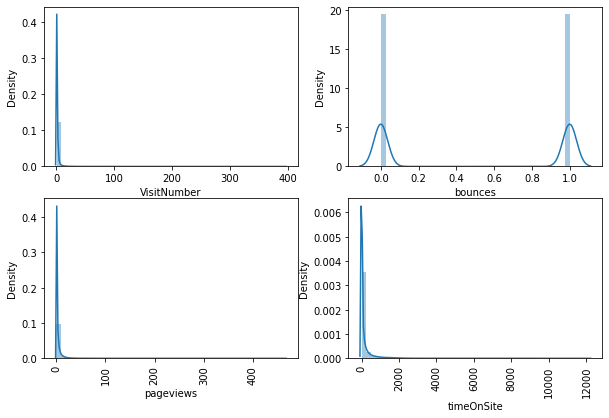

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(mar["VisitNumber"])
plt.subplot(3,2,2)
sns.distplot(mar["bounces"])
plt.subplot(3,2,3)
sns.distplot(mar["pageviews"])
plt.xticks(rotation=90)
plt.subplot(3,2,4)
sns.distplot(mar["timeOnSite"])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


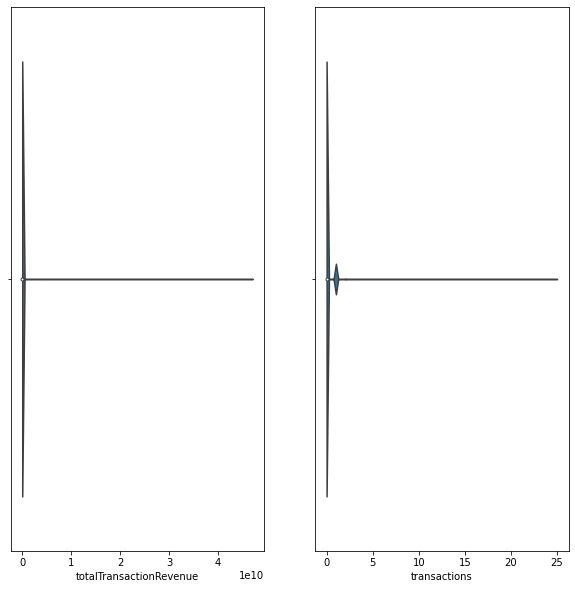

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.violinplot(mar["totalTransactionRevenue"])
plt.subplot(1,2,2)
sns.violinplot(mar["transactions"])

**Desktop is mostly used device followed by mobile and then tablet**

---
**"none" Medium has the highest count followed by "referral" and closely followed by "organic", this shows that the marketing is fine and the server of the website is strong** 

---
**Count of "not set" in campaign means that the traffic is generated from google ads and since desktop users are high the highest used OS is also Windows**    

---





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

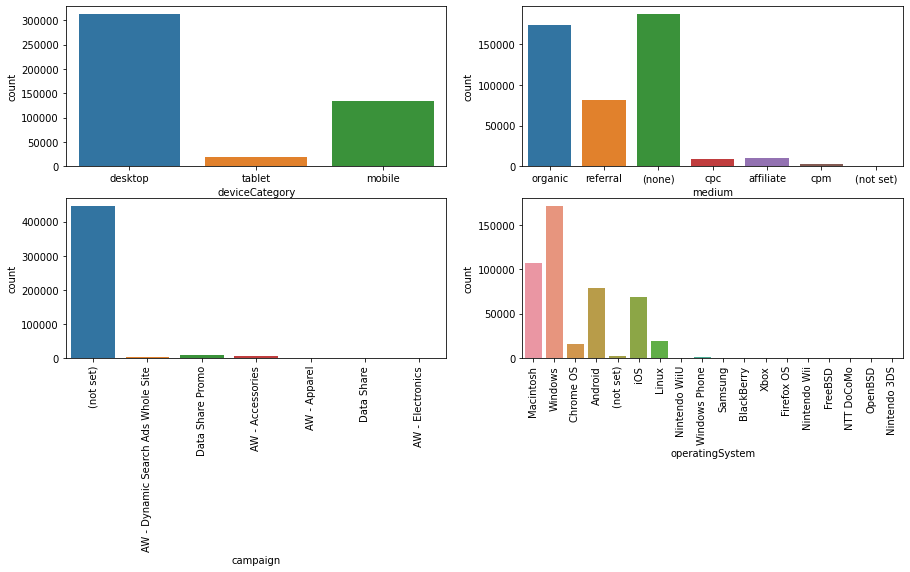

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot("deviceCategory",data=mar)
plt.subplot(3,2,2)
sns.countplot("medium",data=mar)
plt.subplot(3,2,3)
sns.countplot("campaign",data=mar)
plt.xticks(rotation=90)
plt.subplot(3,2,4)
sns.countplot("operatingSystem",data=mar)
plt.xticks(rotation=90)

**Most of the channel is group under organic**   

---
**The source of many visitors is google followed by direct, by direct it means that people have book marked URL and by the likes of it must be some sort of important website, like website to file tax and youtube also has significantly high count than the rest**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

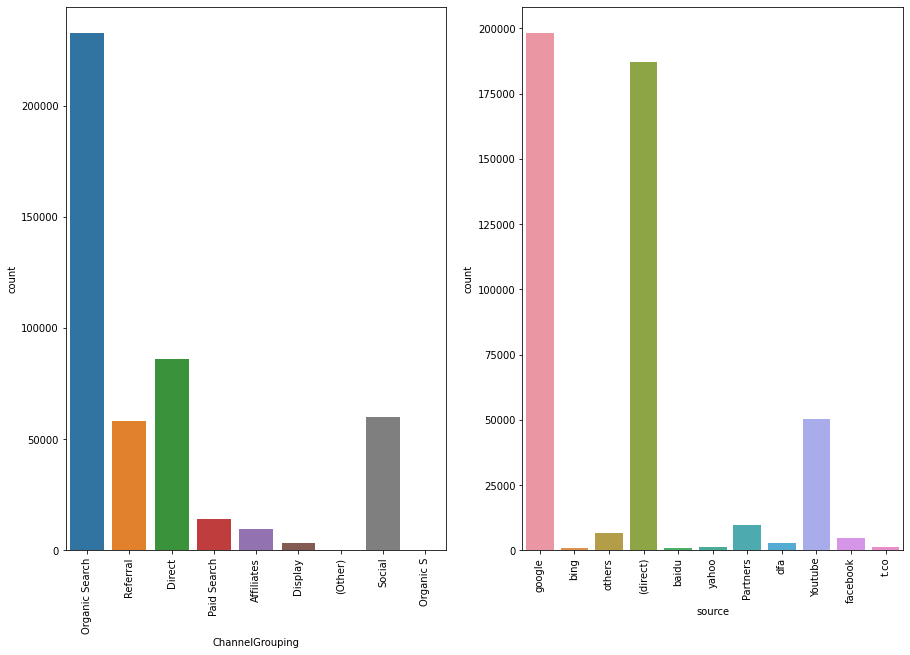

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot("ChannelGrouping",data=mar)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot("source",data=mar)
plt.xticks(rotation=90)

In [21]:
def source(d1,d2,d3):
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  sns.scatterplot(mar.index,d1,d3,data=mar)
  plt.xticks(rotation=90)
  plt.subplot(1,2,2)
  sns.scatterplot(mar.index,d2,d3,data=mar)
  plt.xticks(rotation=90)
#plt.subplot(2,2,3)
#sns.scatterplot(mar.index,"pageviews",hue="source",data=mar)
#plt.subplot(2,2,4)
#sns.scatterplot(mar.index,"timeOnSite",hue="source",data=mar)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.can

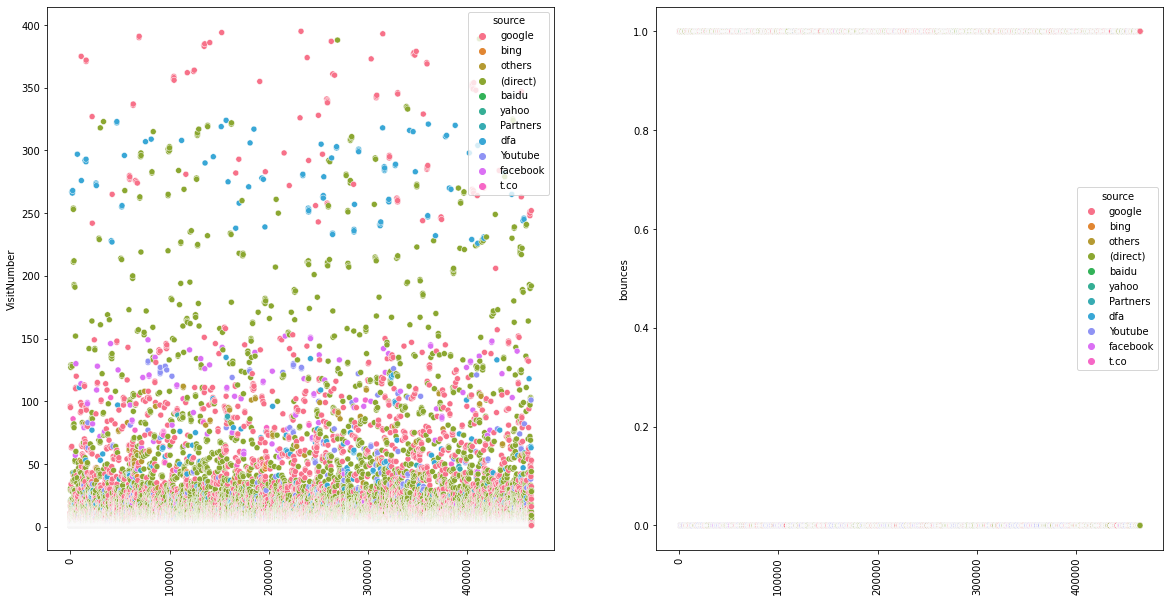

In [22]:
source("VisitNumber","bounces","source")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.can

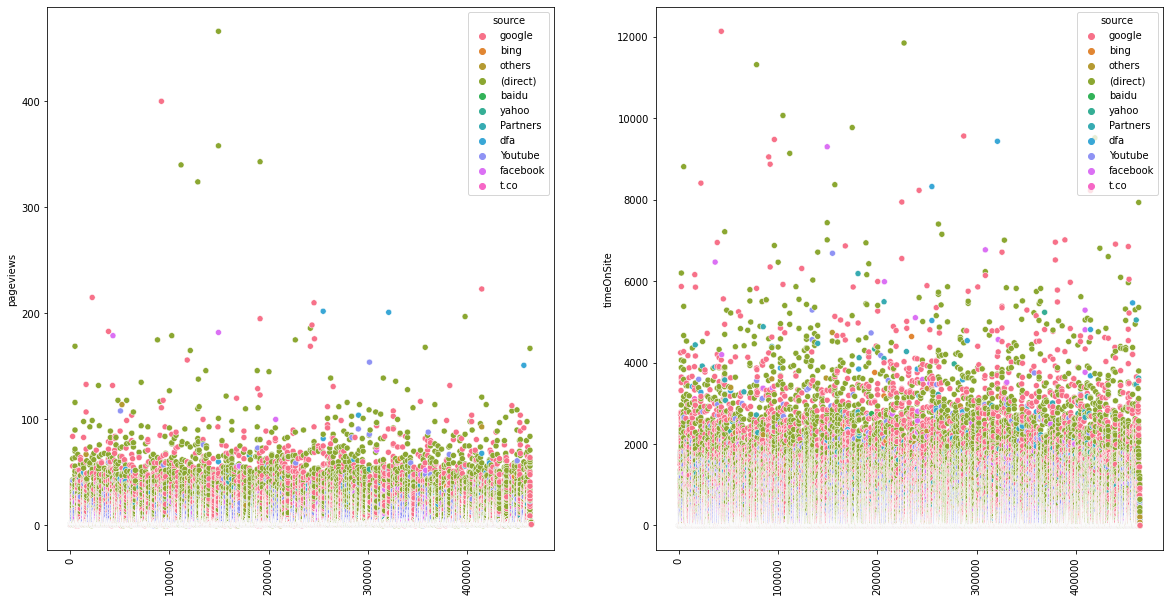

In [23]:
source("pageviews","timeOnSite","source")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


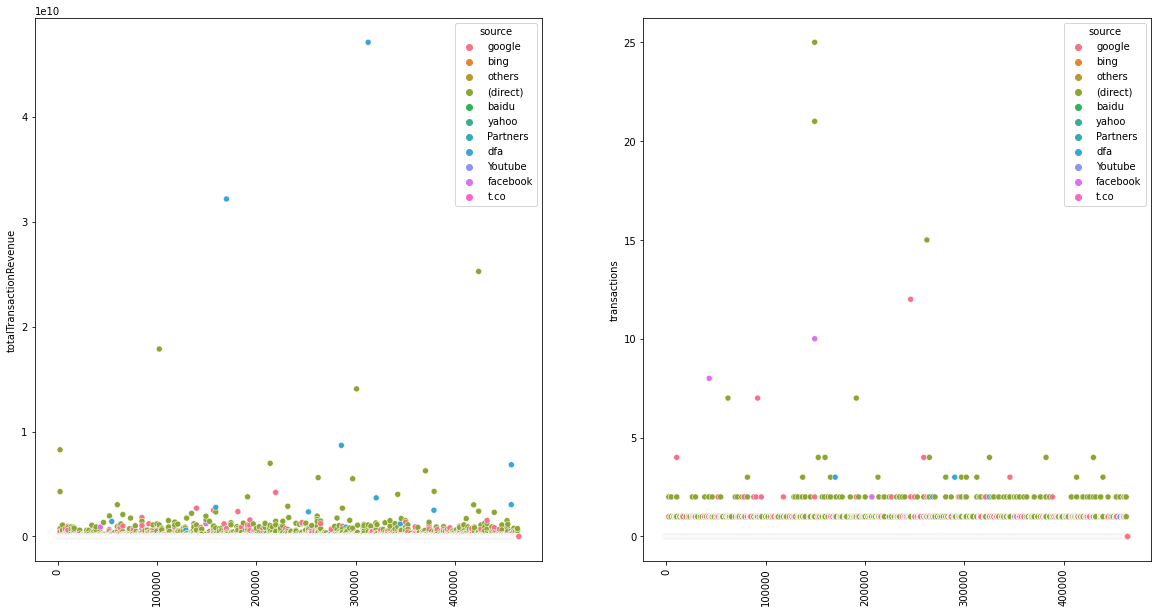

In [24]:
source("totalTransactionRevenue","transactions","source")

In [25]:
n_mar=mar.sample(n=384)

In [26]:
def medium(d1,d2,d3):
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  sns.lineplot(n_mar.index,d1,data=n_mar,hue=d3)
  plt.subplot(1,2,2)
  sns.lineplot(n_mar.index,d2,data=n_mar,hue=d3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


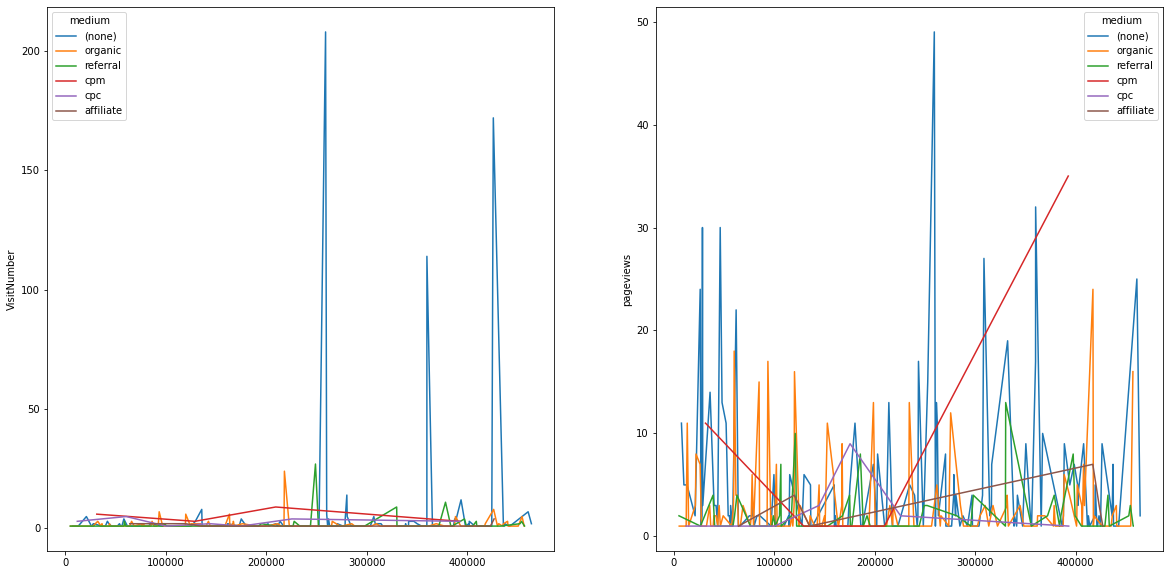

In [27]:
medium("VisitNumber","pageviews","medium")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


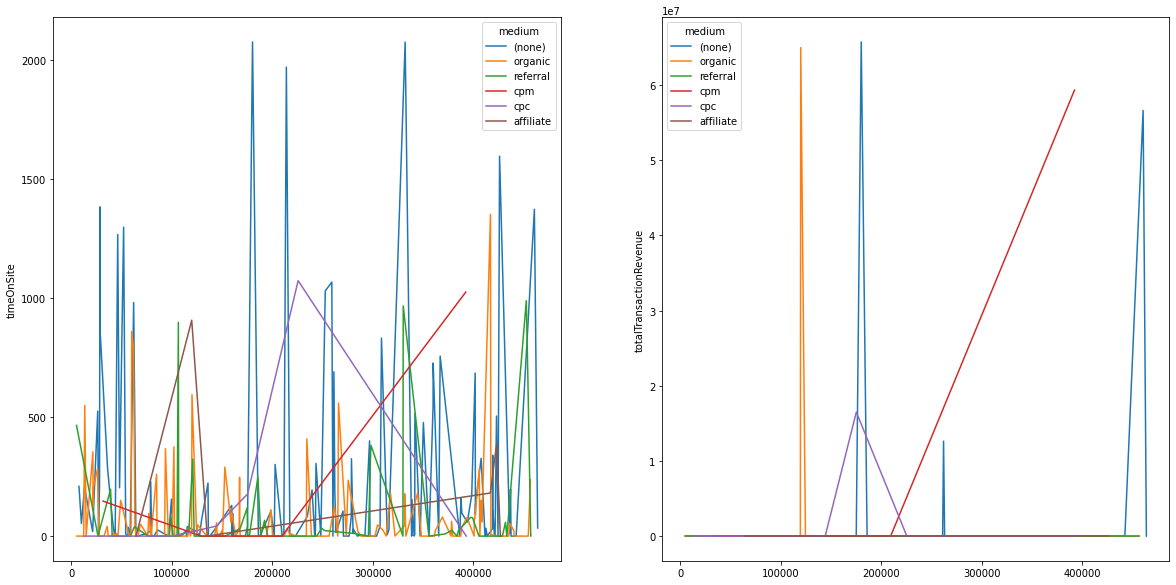

In [28]:
medium("timeOnSite","totalTransactionRevenue","medium")

In [29]:
def campaign(d1,d2,d3,d4,d5):
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,1)
  sns.scatterplot(n_mar.index,d1,hue=d5,data=n_mar)
  plt.xticks([])
  plt.subplot(2,2,2)
  sns.scatterplot(n_mar.index,d2,hue=d5,data=n_mar)
  plt.xticks([])
  plt.subplot(2,2,3)
  sns.scatterplot(n_mar.index,d3,hue=d5,data=n_mar)
  plt.xticks([])
  plt.subplot(2,2,4)
  sns.scatterplot(n_mar.index,d4,hue=d5,data=n_mar)
  plt.xticks([])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

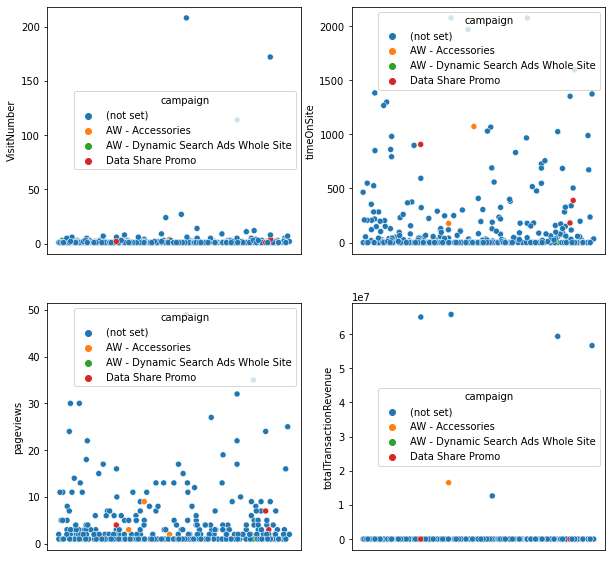

In [30]:
campaign("VisitNumber","timeOnSite","pageviews","totalTransactionRevenue","campaign")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

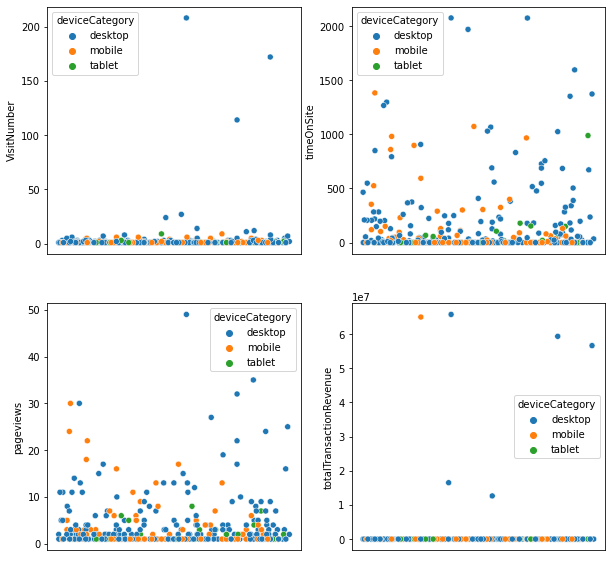

In [31]:
campaign("VisitNumber","timeOnSite","pageviews","totalTransactionRevenue","deviceCategory")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

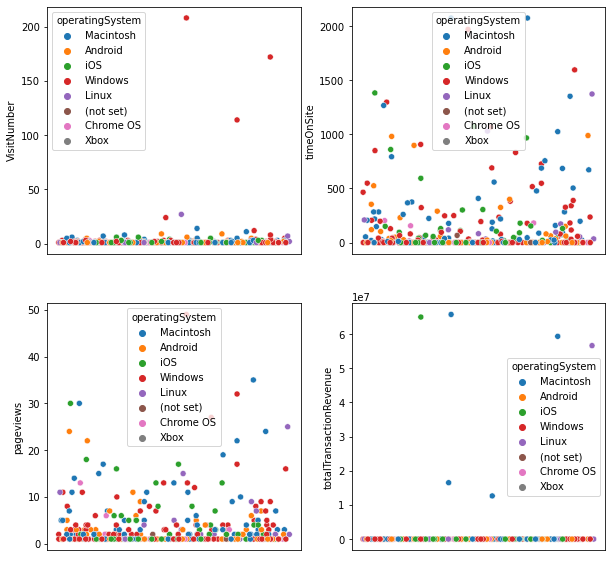

In [32]:
campaign("VisitNumber","timeOnSite","pageviews","totalTransactionRevenue","operatingSystem")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

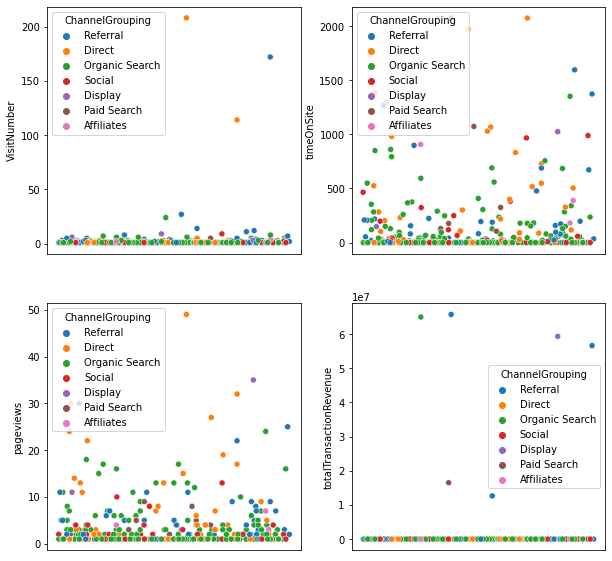

In [33]:
campaign("VisitNumber","timeOnSite","pageviews","totalTransactionRevenue","ChannelGrouping")

**In order to set date column as in index it is important to to have date in datetime format so I used datetime to covert into the required format**

In [34]:
import datetime

mar['Date']=pd.to_datetime(mar["Date"],format="%Y%m%d")

In [35]:
mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   fullVisitorId            464439 non-null  object        
 1   VisitNumber              464439 non-null  int64         
 2   Date                     464439 non-null  datetime64[ns]
 3   VisitStartTime           464439 non-null  int64         
 4   bounces                  464439 non-null  float64       
 5   pageviews                464439 non-null  float64       
 6   timeOnSite               464439 non-null  float64       
 7   totalTransactionRevenue  464439 non-null  float64       
 8   transactions             464439 non-null  float64       
 9   source                   464439 non-null  object        
 10  medium                   464439 non-null  object        
 11  campaign                 464439 non-null  object        
 12  deviceCategory  

**So we have set the date column as an index** 

In [36]:
mar.set_index("Date",inplace=True)

**Now I have reshaped the dataframe monthwise to do analysis monthwise and throught the year** 

In [37]:
mar1=mar[["VisitNumber",'bounces','pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions']].resample("M").mean()

**Throughout the Year:**

---
**Bounces, pageviews and transactions have been constant throught the year
No. of visits have decreased as the year progressed
The time spent on the website has increased till the 7th month and later decreased but again later increased and overall the value has increased from the start of the month to the last month of the year**

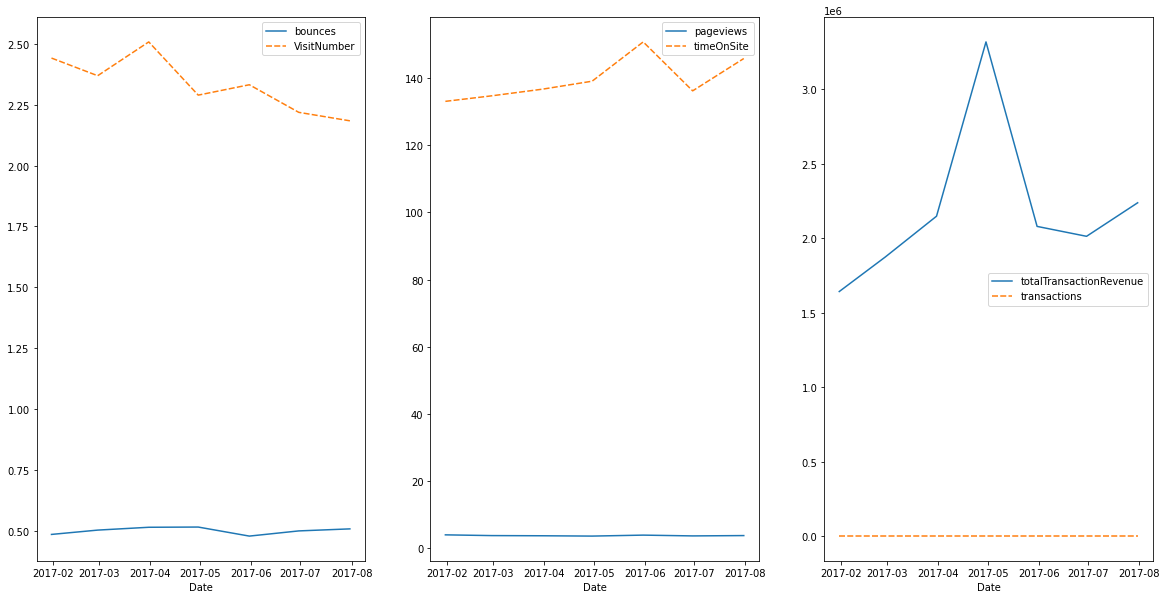

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.lineplot(data=mar1[["bounces","VisitNumber"]])
plt.subplot(1,3,2)
sns.lineplot(data=mar1[['pageviews', 'timeOnSite']])
plt.subplot(1,3,3)
sns.lineplot(data=mar1[['totalTransactionRevenue', 'transactions']])

Month wise

In [39]:
def months(n,d1,d2,d3,d4,d5,d6):
  mm=mar[mar.index.month==n]
  plt.figure(figsize=(20,10))
  plt.subplot(1,3,1)
  sns.lineplot(data=mm[[d1,d2]])
  plt.xticks(rotation=90)
  plt.subplot(1,3,2)
  sns.lineplot(data=mm[[d3,d4]])
  plt.xticks(rotation=90)
  plt.subplot(1,3,3)
  sns.lineplot(data=mm[[d5,d6]])
  plt.xticks(rotation=90)

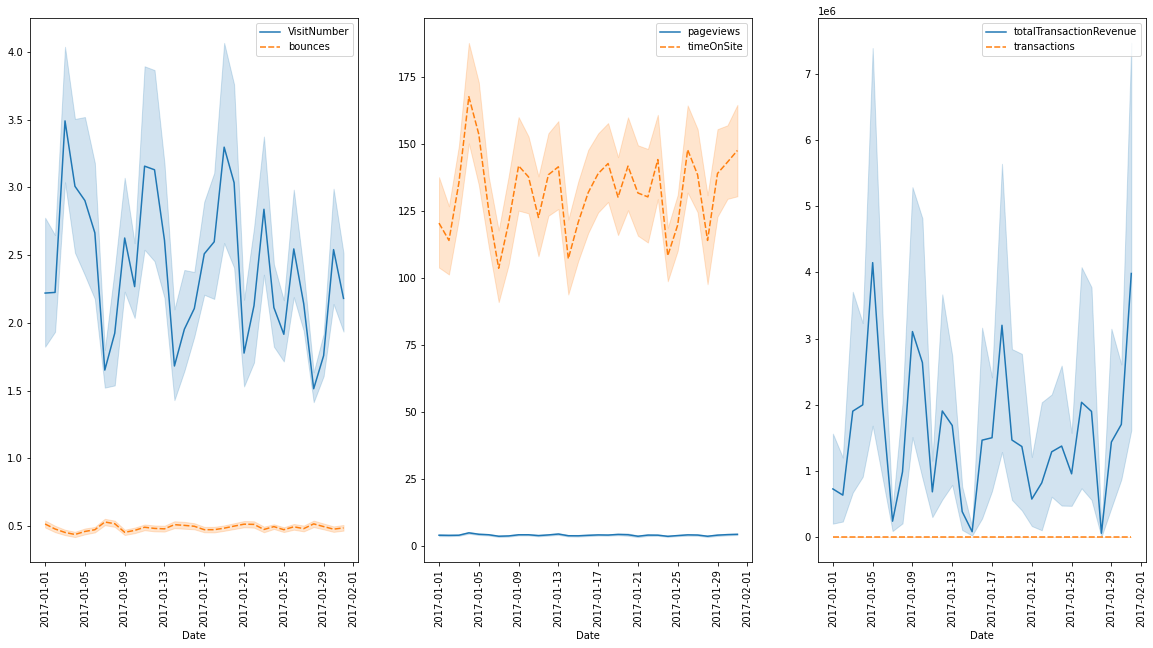

In [40]:
months(1,"VisitNumber",'bounces','pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions')

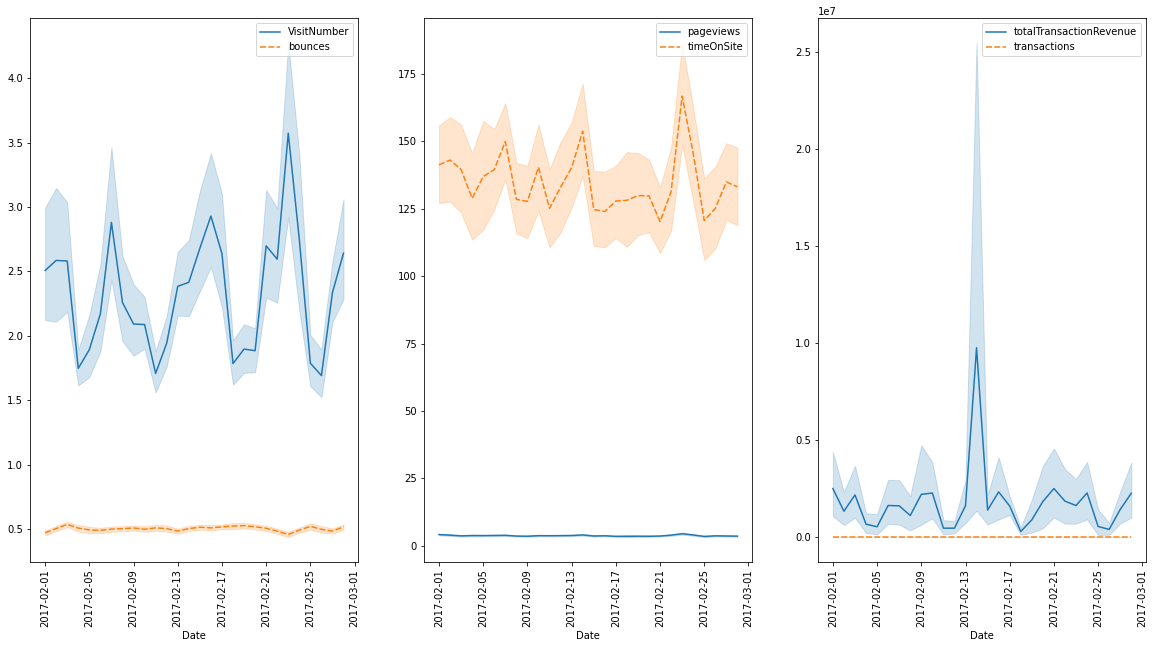

In [41]:
months(2,"VisitNumber",'bounces','pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions')

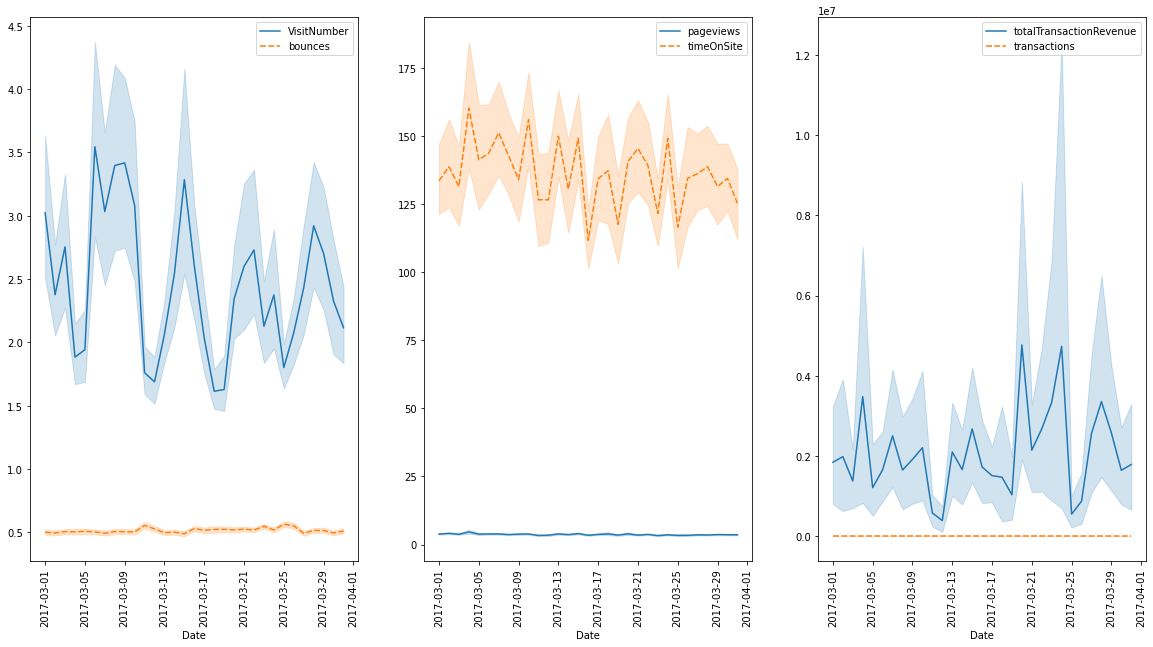

In [42]:
months(3,"VisitNumber",'bounces','pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions')

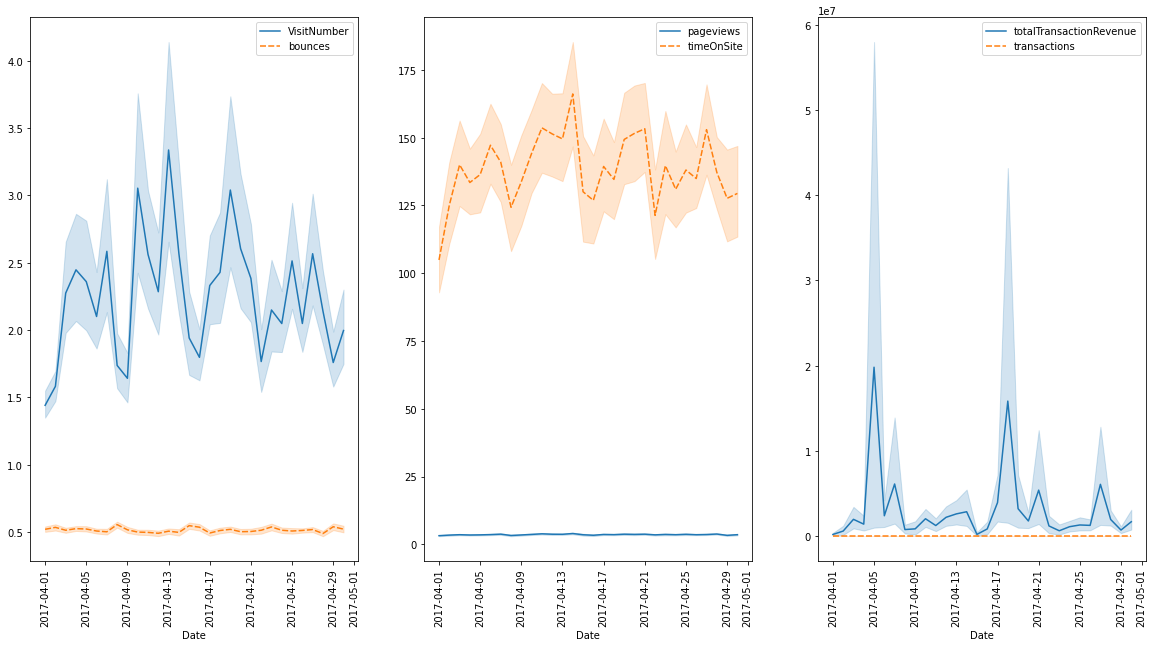

In [43]:
months(4,"VisitNumber",'bounces','pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions')

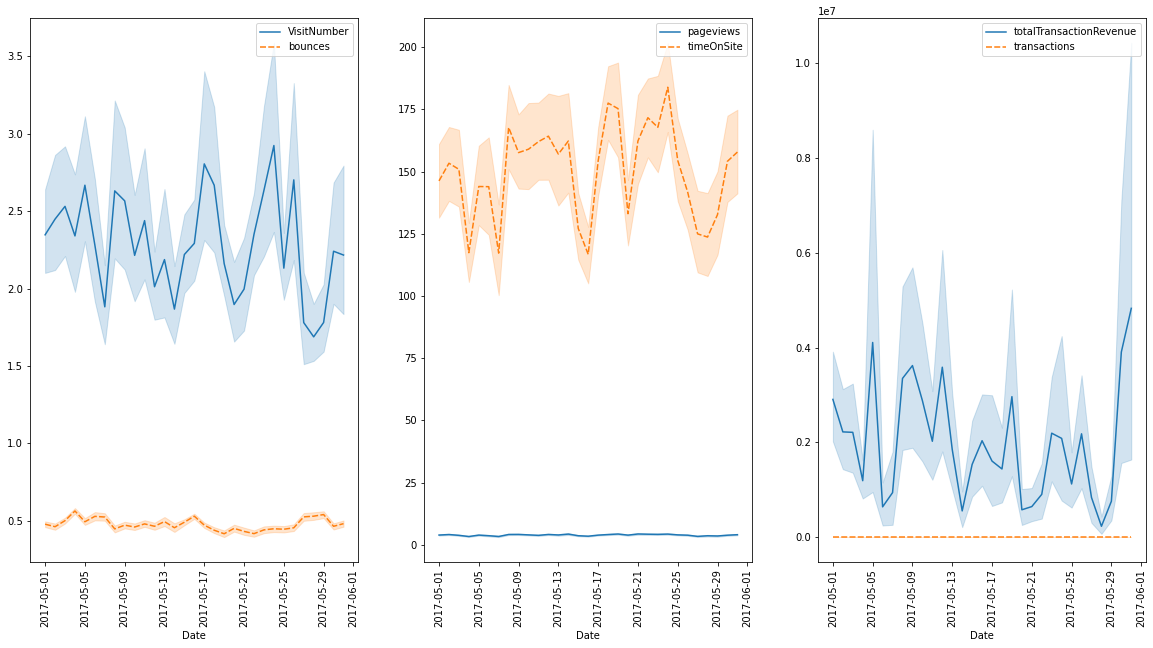

In [44]:
months(5,"VisitNumber",'bounces','pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions')

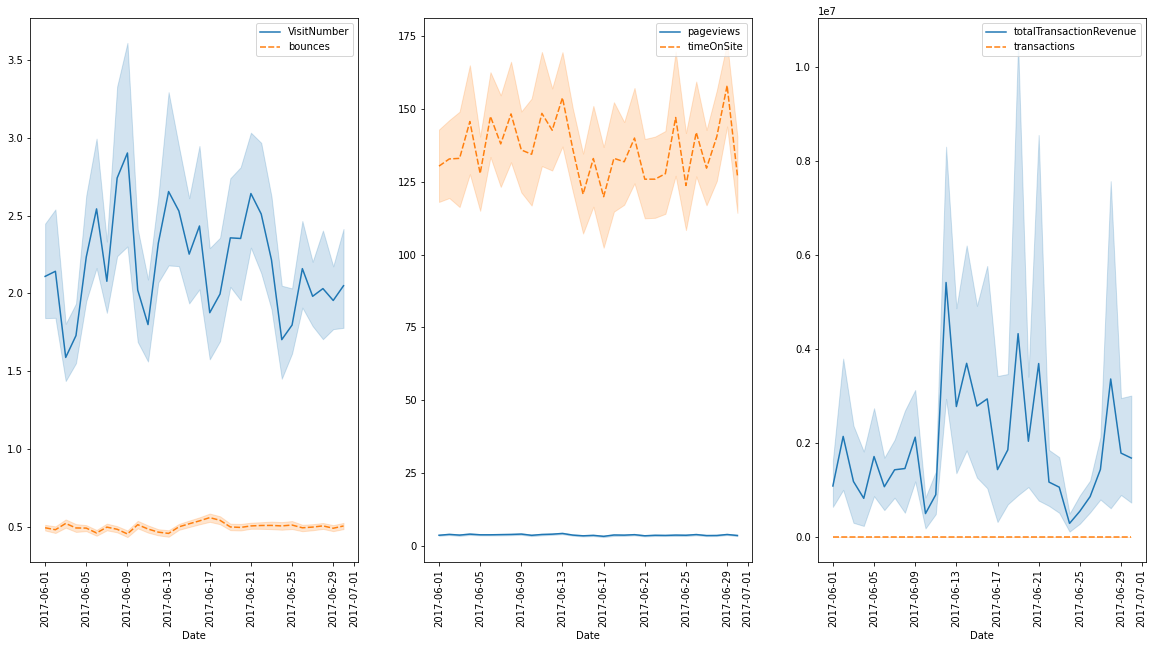

In [45]:
months(6,"VisitNumber",'bounces','pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions')

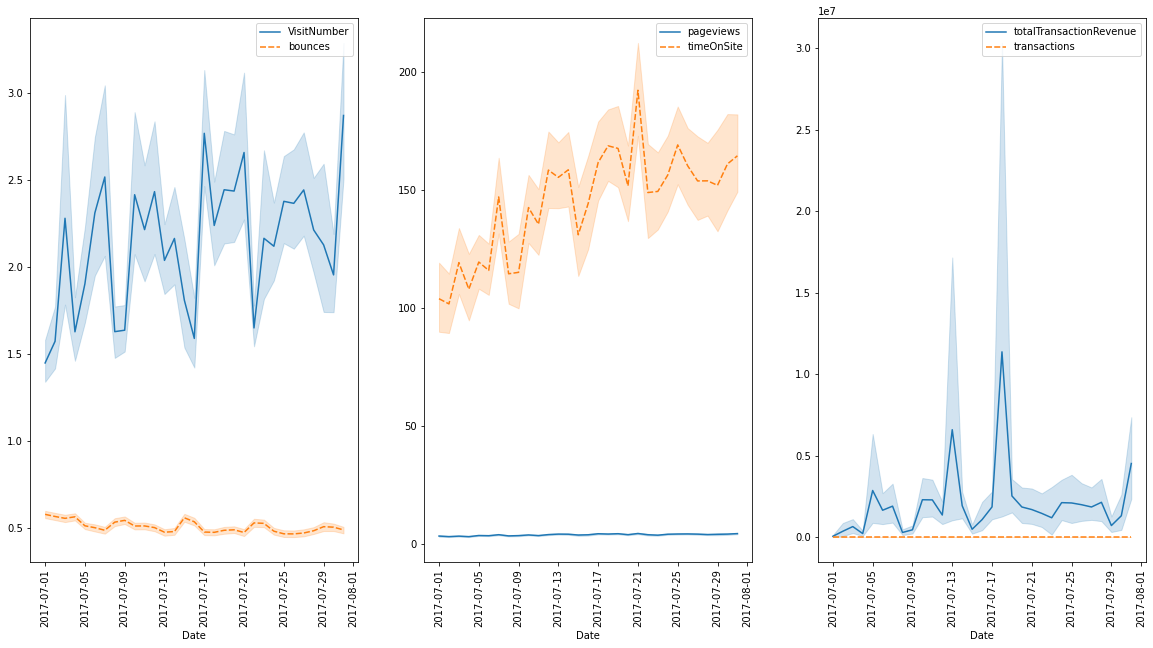

In [46]:
months(7,"VisitNumber",'bounces','pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions')

**Now since the problem was focused on, if the New visitor will do a transaction or not I have only taken vistors who have VisitNumber as 1.
Later I reset the date as column and dropped it along with VisitorID and Visit starttime as all these would appear after the user has left the site and so I dropped all values that do not any impact on Prediction** 

In [ ]:
mar=mar[mar['VisitNumber']==1]
mar.reset_index("Date",inplace=True)
mar.drop(labels=["Date","fullVisitorId","VisitStartTime"],axis=1,inplace=True)
col=["bounces","pageviews","timeOnSite","totalTransactionRevenue","transactions"]
mar[col]=mar[col].applymap(np.int64)


In [ ]:
mar["transactions"]=np.where(  mar["transactions"].isin([7,2,25,21,12,3]),1,mar["transactions"]    )

**Corellation** **matrix:**

---
**To do corelation matrix all the column must have numbers as values, so we will code all the string values to numbers**  


In [49]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
mar["Source"]=LabelEncoder().fit_transform(mar['source'])
mar["Medium"]=LabelEncoder().fit_transform(mar['medium'])
mar["Campaign"]=LabelEncoder().fit_transform(mar['campaign'])
mar["DeviceCategory"]=LabelEncoder().fit_transform(mar['deviceCategory'])
mar["OperatingSystem"]=LabelEncoder().fit_transform(mar['operatingSystem'])
mar["City"]=LabelEncoder().fit_transform(mar['city'])
mar["channelGrouping"]=LabelEncoder().fit_transform(mar['ChannelGrouping'])

**Since coding the string values will create additional columns we need drop the old string columns**  

In [ ]:
mar.drop(['VisitNumber', 'source', 'medium',
       'campaign', 'deviceCategory', 'operatingSystem', 'city',
       'ChannelGrouping',"totalTransactionRevenue"],axis=1,inplace=True)

**Plotting corelation matrix in heatmap**

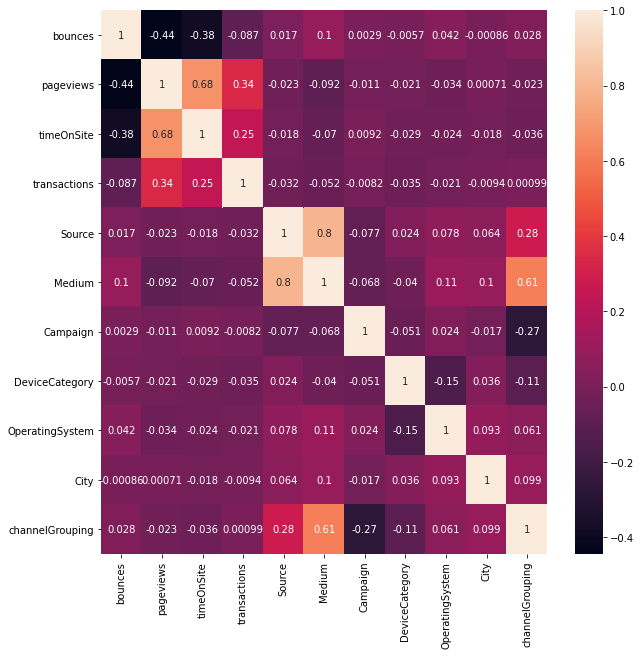

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(mar.corr(),annot=True)

**Importing libraries for prediction**

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz

**Seperating Dependent and Independent variables and creating test and train variables**

In [54]:
y=mar['transactions']
x=mar.drop('transactions',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101)

**Trying** **to see the important features**







In [55]:
model1=RandomForestClassifier()
model1.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

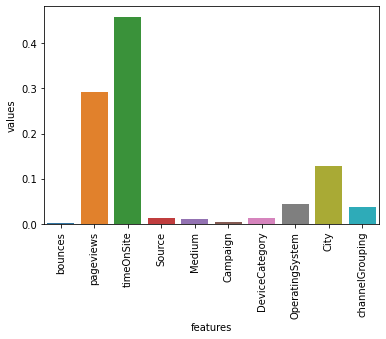

In [56]:
feature=model1.feature_importances_
data=pd.DataFrame({"features":x.columns,"values":feature})
sns.barplot("features","values",data=data)
plt.xticks(rotation=90)

**Prediction Accuracy (overfitting:98.9%)**

In [57]:
model2=DecisionTreeClassifier(random_state=101)
model2.fit(x_train,y_train)
yhat=model2.predict(x_test)
round(accuracy_score(y_test,yhat)*100,2)

98.9

[Text(279.0, 489.24, 'pageviews <= 15.5\ngini = 0.014\nsamples = 264942\nvalue = [263115, 1827]\nclass = Yes'),
 Text(139.5, 380.52000000000004, 'pageviews <= 11.5\ngini = 0.003\nsamples = 255972\nvalue = [255583, 389]\nclass = Yes'),
 Text(69.75, 271.8, 'pageviews <= 9.5\ngini = 0.001\nsamples = 249804\nvalue = [249707, 97]\nclass = Yes'),
 Text(34.875, 163.08000000000004, 'pageviews <= 7.5\ngini = 0.0\nsamples = 244706\nvalue = [244677, 29]\nclass = Yes'),
 Text(17.4375, 54.360000000000014, '\n  (...)  \n'),
 Text(52.3125, 54.360000000000014, '\n  (...)  \n'),
 Text(104.625, 163.08000000000004, 'Source <= 0.5\ngini = 0.026\nsamples = 5098\nvalue = [5030, 68]\nclass = Yes'),
 Text(87.1875, 54.360000000000014, '\n  (...)  \n'),
 Text(122.0625, 54.360000000000014, '\n  (...)  \n'),
 Text(209.25, 271.8, 'Source <= 0.5\ngini = 0.09\nsamples = 6168\nvalue = [5876, 292]\nclass = Yes'),
 Text(174.375, 163.08000000000004, 'timeOnSite <= 244.5\ngini = 0.134\nsamples = 2954\nvalue = [2740, 214]

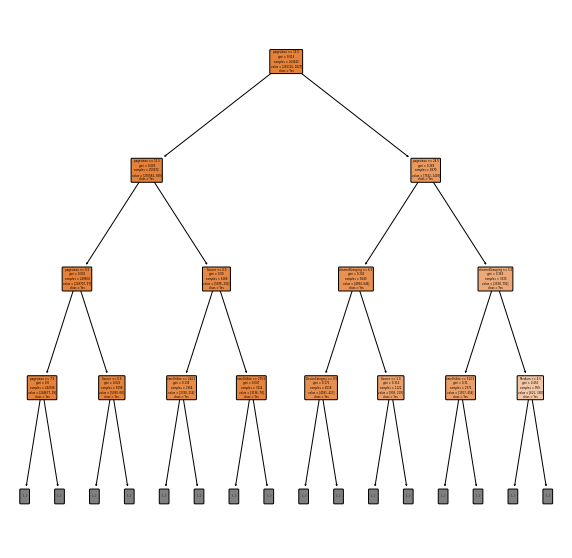

In [58]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model2.fit(x_train,y_train),max_depth=3,filled=True,rounded=True,class_names=["Yes","No"],feature_names=x.columns)

**Since first model of predicting was overfitting we are trying to find Alpha value by the cost complexity pruning**

In [59]:
path=model2.cost_complexity_pruning_path(x_train,y_train)
alpha,impurity=path.ccp_alphas,path.impurities

In [60]:
y=[]
for i in alpha:
  model2=DecisionTreeClassifier(random_state=101,ccp_alpha=i)
  model2.fit(x_train,y_train)
  y.append(model2)

In [61]:
train_scores=[]
test_scores=[]
for j in y:
  train_scores.append(j.score(x_train,y_train))
  test_scores.append(j.score(x_test,y_test))

**Now we see that from alpha value=0.00025 and beyound the accuracy will increase as the difference between test and train are minimum**

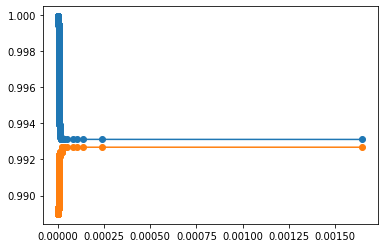

In [62]:
plt.plot(alpha,train_scores,marker="o",drawstyle="steps-post")
plt.plot(alpha,test_scores,marker="o",drawstyle="steps-post")


**Predicting wth new Alpha value: 99.27%**

In [68]:
model3=DecisionTreeClassifier(random_state=101,ccp_alpha=0.00025)
model3.fit(x_train,y_train)
yhat=model3.predict(x_test)
round(accuracy_score(y_test,yhat)*100,2)

99.27

[Text(167.4, 163.07999999999998, 'pageviews <= 15.5\ngini = 0.014\nsamples = 264942\nvalue = [263115, 1827]\nclass = Y'),
 Text(83.7, 54.360000000000014, 'gini = 0.003\nsamples = 255972\nvalue = [255583, 389]\nclass = Y'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.269\nsamples = 8970\nvalue = [7532, 1438]\nclass = Y')]

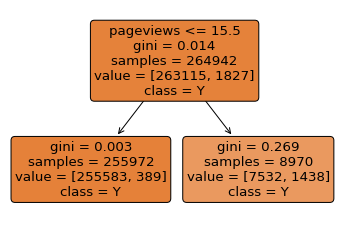

In [69]:
tree.plot_tree(model3.fit(x_train,y_train),filled=True,rounded=True,class_names=["Y","N"],feature_names=x.columns)

**Predicting new Values**

In [71]:
model3.predict([[0,15,344,7,5,0,0,7,257,5]])

array([0])

**Extras**

In [66]:
'''source: array(['google', 'bing', 'others', '(direct)', 'baidu', 'yahoo',       devicecategory: array(['desktop', 'mobile', 'tablet'], dtype=object)
       'Partners', 'dfa', 'Youtube', 'facebook', 't.co'], dtype=object)                           array([0, 1, 2])
array([ 7,  4,  8,  0,  3, 10,  1,  5,  2,  6,  9])
                                                                                    os:    array(['Macintosh', 'Windows', 'Chrome OS', 'Android', '(not set)', 'iOS',
                                                                                     'Linux', 'Nintendo WiiU', 'Windows Phone', 'Samsung', 'BlackBerry',
                                                                                        'Xbox', 'Firefox OS', 'FreeBSD', 'NTT DoCoMo', 'Nintendo Wii',
                                                                                           'OpenBSD', 'Nintendo 3DS'], dtype=object)
medium: array(['organic', 'referral', '(none)', 'cpc', 'affiliate', 'cpm',
       '(not set)'], dtype=object)                                                           array([ 7, 14,  3,  1,  0, 17,  6, 11, 15, 13,  2, 16,  4,  5,  8, 10, 12,9])     
     array([5, 6, 0, 3, 2, 4, 1])                                                                   
                                                                                              array([257, 435, 237, 343, 294,  45, 162,  53, 218,   1,  43, 103,  90,
       391, 258, 195, 259,  59, 416, 267, 313, 270, 215, 196, 224, 292,
        18, 434, 383, 342,  32, 298, 296, 246, 288,  33, 188, 121, 155,
       166, 373, 397, 219, 381, 118, 344, 354, 361, 351,  92, 250, 315,
       302, 350,  27, 341,  50,  25, 120, 235, 139, 255, 359, 173, 115,
       164, 378, 117, 415, 241,  77, 369, 222, 177, 408, 305, 367, 203,
       293, 247, 336,  55, 189, 111, 356,  38, 104,   5, 281,  63, 243,
       300, 161, 407, 190, 171,   6, 372,  24, 192,  69, 256,  68, 198,
       108,  15, 239, 428,  95, 297, 309, 308, 148, 169, 205, 276, 200,
        88,  12, 244, 179, 385, 199, 289,  26, 419, 262, 340, 280, 272,                                         channel grouping: 
        17, 321,  70, 157, 119, 202, 404, 110, 328, 398, 366, 221, 429,
       186, 327, 249, 152, 131, 226, 181, 213, 233, 278,  21, 184, 346,
        49, 194, 355, 229, 326,  75,  86, 410, 174,   9, 231,  87, 234,
       418, 333, 105, 392, 363,  19, 299, 320, 252,  37,  51,  79,  44,
        85, 129, 106, 317, 332, 228, 295, 273, 301, 147,  22, 204, 310,
       362, 143, 168,  97, 124, 430, 390, 282,  84, 264,  71, 348, 318,
       371,  83, 303, 183, 191,  42, 178, 176,   8, 291, 209, 112, 420,
       128, 399, 182, 245, 431, 307, 260, 322,  93, 135, 269, 432,  23,
       394, 227, 130,  72, 396, 220,  47, 206, 236,  76,  58, 136, 395,
        96, 287,  81, 387,  67, 263, 242, 347, 412,  65, 325, 144, 353,
        46, 251,  61,  48, 149,  74,  41, 323, 409, 380, 382, 223, 388,
        89, 285, 138, 116, 165,  35, 316,   2, 384, 140, 141, 413, 329,
       352,  99, 370, 146, 253, 125, 159,  40, 405,  10, 187,  80, 377,
       216, 274, 211, 142, 337, 113,  52, 386, 427, 290, 312, 345, 132,
       279,  13, 133, 163, 167,  73,  94, 151,  20,   3, 160, 275, 154,
        31, 376,  66, 424, 358,  28, 123, 360, 334,  98, 248, 374, 217,
       100, 238, 393, 266, 311,  64, 180, 314, 286, 319, 122,  14, 268,
       109,  36, 304, 150, 208, 210, 214, 127, 265, 225,  82, 158, 411,
       403,  62,   7, 271,  56, 401, 330,   0, 201, 421,  29, 417, 197,
       185, 400, 365, 423, 357, 207, 389, 422, 156, 134, 339, 349,  91,
       212, 137, 145, 283, 277, 101,  39, 107, 433, 284, 338,  78, 335,
       172, 230, 126, 261,  11, 324, 426, 232, 240,  54, 153,  57, 175,
       102, 114,  16, 414, 331, 306,  34, 193, 368, 364, 254, 379,  30,
       375, 170, 425,  60, 406, 402,   4])
campaign: array(['(not set)', 'AW - Dynamic Search Ads Whole Site',
       'Data Share Promo', 'AW - Accessories', 'AW - Apparel',
       'Data Share', 'AW - Electronics'], dtype=object)
      array([0, 3, 6, 1, 2, 5, 4]) 
      
      
  city: ['Mountain View', 'not available in demo dataset', 'Melbourne',
       'San Francisco', 'Paris', 'Berlin', 'Hong Kong', 'Boston',
       'London', '(not set)', 'Bengaluru', 'Cologne', 'Chennai',
       'Tel Aviv-Yafo', 'Mumbai', 'Krakow', 'Munich', 'Bratislava',
       'Washington', 'New Delhi', 'Pune', 'New York', 'Lisbon',
       'Kuala Lumpur', 'Madrid', 'Palo Alto', 'Ann Arbor', 'Zurich',
       'Sydney', 'San Diego', 'Bangkok', 'Philadelphia', 'Perth',
       'Minato', 'Overland Park', 'Barcelona', 'Kiev', 'Dundalk',
       'Hamburg', 'Hyderabad', 'South San Francisco', 'Toronto',
       'Los Angeles', 'Sunnyvale', 'Detroit', 'San Jose', 'Santiago',
       'Seoul', 'Santa Clara', 'Chicago', 'Mississauga', 'Quezon City',
       'Pittsburgh', 'Santa Ana', 'Austin', 'San Bruno', 'Bogota',
       'Atlanta', 'Dublin', 'Medellin', 'Fremont', 'Montreal', 'Seattle',
       'Istanbul', 'Dallas', 'Houston', 'Stockholm', 'Denver', 'Warsaw',
       'Mexico City', 'Cambridge', 'Singapore', 'Lyon', 'Jakarta',
       'Vienna', 'Portland', 'Shinjuku', 'Lake Oswego', 'Panama City',
       'Minneapolis', 'Salem', 'Boulder', 'Kirkland', 'Cupertino',
       'Sao Paulo', 'Beijing', 'Colombo', 'Adelaide', 'Osaka', 'Brisbane',
       'Milan', 'Phoenix', 'Ho Chi Minh City', 'Vancouver', 'Kitchener',
       'Irvine', 'Ahmedabad', 'Sofia', 'Athens', 'Kolkata', 'Budapest',
       'Moscow', 'Bucharest', 'Kyiv', 'Cork', 'Amsterdam', 'Menlo Park',
       'Yokohama', 'Chiyoda', 'Petaling Jaya', 'Prague',
       'Pozuelo de Alarcon', 'Gothenburg', 'Indore', 'Lawrence Township',
       'Oakland', 'Lagos', 'Charlotte', 'Altrincham', 'Milpitas',
       'Jersey City', 'Taguig', 'La Victoria', 'Oviedo', 'Auckland',
       'Westlake Village', 'Nantes', 'San Antonio', 'Orlando', 'Ningbo',
       'Ankara', 'Redwood City', 'Buenos Aires', 'Hanoi', 'Dubai',
       'Lahore', 'Utrecht', 'Courbevoie', 'Rome', 'Towson', 'Shibuya',
       'Lucknow', 'Zagreb', 'Kharagpur', 'Riyadh', 'Minxiong Township',
       'Gurgaon', 'Evanston', 'Makati', 'Kalamazoo', 'Lille', 'McAllen',
       'Oneonta', 'Appleton', 'Karachi', 'San Mateo', 'Boardman',
       'Koszalin', 'Santiago de Surco', 'Manchester', 'Rio de Janeiro',
       'Calgary', 'Chamblee', 'Villanova', 'Izmir', 'Alexandria',
       'Maracaibo', 'Chandigarh', 'Mechelen', 'Wellesley',
       'Saint Petersburg', 'Columbus', 'Tempe', 'Shanghai', 'Antalya',
       'Phnom Penh', 'Redmond', 'Monterrey', 'Bath', 'Boise', 'Campinas',
       'Berkeley', 'Casablanca', 'Elche', 'Copenhagen', 'Raleigh',
       'Sacramento', 'Manaus', 'Patna', 'Noida', 'Piscataway Township',
       'Goose Creek', 'Arequipa', 'Lausanne', 'Prato', 'Seville',
       'Geneva', 'Indianapolis', 'Cincinnati', 'Eau Claire',
       'Zaoqiao Township', 'Tbilisi', 'Oshkosh', 'Carrollton',
       'Nashville', 'Burlington', 'Sandy Springs', 'Ramat Gan', 'Smyrna',
       'Caracas', 'Plano', 'Kansas City', 'Kochi', 'Bellingham', 'Jeddah',
       'Jaipur', 'Alba', 'Padua', 'Leusden', 'Curitiba', 'Westville',
       'El Paso', 'Tucson', 'Kampar', 'Milwaukee', 'Zaragoza', 'Poznan',
       'Naha', 'Rexburg', 'Chico', 'Florianopolis', 'New Westminster',
       'Zhongli District', 'Ashburn', 'Thessaloniki', 'Malaga', 'Erode',
       'Burnaby', 'Tigard', 'Louisville', 'Bilbao', 'Leeds', 'Medina',
       'Cali', 'Brampton', 'Fort Collins', 'Thornton', 'Chuo',
       'Oude Meer', 'Canterbury', 'Tallinn', 'Brussels', 'Naples',
       'Miami', 'San Salvador', 'Vilnius', 'Brno', 'Riga', 'Ghent',
       'Santa Monica', 'Bhubaneswar', 'Miyazaki', 'Bremen', 'Birmingham',
       'Greystones', 'Cairo', 'Bellflower', 'Richardson',
       'Villafranca del Castillo', 'Subang Jaya', 'Surabaya', 'Madison',
       'Tampa', 'Charlottesville', 'Ostrava', 'Frankfurt', 'Decin',
       'Hradec Kralove', 'Barranquilla', 'Quimper', 'Aalborg', 'Szczecin',
       'Fresno', 'Fukui', 'Vincennes', 'Rosario', 'Santa Fe',
       'Clermont-Ferrand', 'Skopje', 'Glasgow', 'Montevideo', 'Edmonton',
       'Helsinki', 'Bellevue', 'Valencia', 'Alicante', 'Kharkiv',
       'Cancun', 'Stanford', 'Liverpool', 'North Richland Hills',
       'Lewisville', 'Furth', 'Salford', 'Cyberjaya', 'Bordeaux',
       'Tallahassee', 'Wroclaw', 'Oxford', 'Pueblo', 'San Marcos',
       'Fareham', 'Orem', 'Amberg', 'Farmington Hills', 'Honolulu',
       'Iasi', 'Cagliari', 'Chisinau', 'Guatemala City', 'Antwerp',
       'Aalen', 'Herzliya', 'Nottingham', 'Hallein', 'Bandung',
       'St. Louis', 'Brookline', 'Winnipeg', 'Schagen', 'Avon',
       'East Lansing', 'Seongnam-si', "Saint-Ouen-l'Aumone",
       'Ciudad Real', 'Minsk', 'Spaichingen', 'Ljubljana', 'Coffeyville',
       'Memphis', 'The Hague', 'Neipu Township', 'Pryor', 'Bristol',
       'Johnson City', 'Quebec City', 'Ottawa', 'Randburg', 'Dusseldorf',
       'Amersfoort', 'New Orleans', 'Council Bluffs', 'Barrie',
       'Pleasanton', 'Groningen', 'Lenoir', 'Leuven', 'Lincoln',
       'Eindhoven', 'Navi Mumbai', 'Makassar', 'Cape Town', 'Hayward',
       "Villeneuve-d'Ascq", 'University Park', 'Brest', 'Akron', 'Newark',
       'Bournemouth', 'Turin', 'Rotterdam', "'s Hertogenbosch",
       'Laguna Beach', 'Wheeling', 'Ballinger', 'Watford', 'Kumamoto',
       'Katowice', 'Tunis', 'Sherbrooke', 'Whitewater', 'Saratoga',
       'Lehi', 'Taoyuan District', 'White Plains', 'Hangzhou', 'Faro',
       'Salzburg', 'Sant Cugat del Valles', 'Chevilly Larue', 'Lexington',
       'Fortaleza', 'Gijon', 'Osijek', 'Omaha', 'College Park',
       'Belagavi', 'Cordoba', 'Zhudong Township', 'Oslo',
       'Salt Lake City', 'Camden', 'Sakai', 'Issy-les-Moulineaux',
       'Mar del Plata', 'Egham', 'Nairobi', 'Almeria', 'Ridgewood',
       'Wrexham', 'Marlboro', 'Metz', 'Bothell', 'Guwahati', 'Bozeman',
       'Jacksonville', 'Collegeville', 'Dahlonega', 'Anaheim',
       'Walnut Creek', 'Sabadell', 'Porto Alegre', 'Barnsley', 'Kosice',
       'Shiocton', 'Sheffield', 'Montigny-le-Bretonneux', 'Stuttgart',
       'Baltimore', 'Springfield', 'Ipoh', 'Woodbridge Township', 'Breda',
       'Valparaiso', 'Union City', 'Aberdeen'] 
       
       
       
channel grouping : array(['Organic Search', 'Referral', 'Direct', 'Paid Search',
       'Affiliates', 'Display', 'Social', '(Other)', 'Organic S'   
                array([5, 7, 2, 6, 1, 3, 8, 0, 4]'''

'source: array([\'google\', \'bing\', \'others\', \'(direct)\', \'baidu\', \'yahoo\',       devicecategory: array([\'desktop\', \'mobile\', \'tablet\'], dtype=object)\n       \'Partners\', \'dfa\', \'Youtube\', \'facebook\', \'t.co\'], dtype=object)                           array([0, 1, 2])\narray([ 7,  4,  8,  0,  3, 10,  1,  5,  2,  6,  9])\n                                                                                    os:    array([\'Macintosh\', \'Windows\', \'Chrome OS\', \'Android\', \'(not set)\', \'iOS\',\n                                                                                     \'Linux\', \'Nintendo WiiU\', \'Windows Phone\', \'Samsung\', \'BlackBerry\',\n                                                                                        \'Xbox\', \'Firefox OS\', \'FreeBSD\', \'NTT DoCoMo\', \'Nintendo Wii\',\n                                                                                           \'OpenBSD\', \'Nintendo 3DS\'], dtype=object)\nmedium: ar